Aditi Bhatia: 24226039

Dataset used: UCI Heart Disease Dataset https://archive.ics.uci.edu/dataset/45/heart+disease

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [261]:
cleveland_data = pd.read_csv('/content/drive/MyDrive/health-beacon/processed.cleveland.data', header=None)
hungarian_data = pd.read_csv('/content/drive/MyDrive/health-beacon/processed.hungarian.data', header=None)
switzerland_data = pd.read_csv('/content/drive/MyDrive/health-beacon/processed.switzerland.data', header=None)
va_data = pd.read_csv('/content/drive/MyDrive/health-beacon/processed.va.data', header=None)

In [262]:
va_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [263]:
column_names = [
    'age',         # #3
    'sex',         # #4
    'cp',          # #9
    'trestbps',    # #10
    'chol',        # #12
    'fbs',         # #16
    'restecg',     # #19
    'thalach',     # #32
    'exang',       # #38
    'oldpeak',     # #40
    'slope',       # #41
    'ca',          # #44
    'thal',        # #51
    'num'          # #58 (the predicted attribute)
]

# Assign column names to each DataFrame
cleveland_data.columns = column_names
hungarian_data.columns = column_names
switzerland_data.columns = column_names
va_data.columns = column_names

In [264]:
print("Cleveland Data:")
print(cleveland_data.head())

Cleveland Data:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [265]:
print("Hungarian Data:")
print(hungarian_data.head())

Hungarian Data:
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num  
0    ?    0  
1    ?    0  
2    ?    0  
3    6    0  
4    ?    0  


In [266]:
print("Switzerland Data:")
print(switzerland_data.head())

Switzerland Data:
   age  sex  cp trestbps  chol fbs restecg thalach exang oldpeak slope ca  \
0   32    1   1       95     0   ?       0     127     0      .7     1  ?   
1   34    1   4      115     0   ?       ?     154     0      .2     1  ?   
2   35    1   4        ?     0   ?       0     130     1       ?     ?  ?   
3   36    1   4      110     0   ?       0     125     1       1     2  ?   
4   38    0   4      105     0   ?       0     166     0     2.8     1  ?   

  thal  num  
0    ?    1  
1    ?    1  
2    7    3  
3    6    1  
4    ?    2  


In [267]:
print("VA Data:")
print(va_data.head())

VA Data:
   age  sex  cp trestbps chol fbs  restecg thalach exang oldpeak slope ca  \
0   63    1   4      140  260   0        1     112     1       3     2  ?   
1   44    1   4      130  209   0        1     127     0       0     ?  ?   
2   60    1   4      132  218   0        1     140     1     1.5     3  ?   
3   55    1   4      142  228   0        1     149     1     2.5     1  ?   
4   66    1   3      110  213   1        2      99     1     1.3     2  ?   

  thal  num  
0    ?    2  
1    ?    0  
2    ?    2  
3    ?    1  
4    ?    0  


Handling Missing Values

In [268]:
cleveland_data.replace('?', np.nan, inplace=True)
hungarian_data.replace('?', np.nan, inplace=True)
switzerland_data.replace('?', np.nan, inplace=True)
va_data.replace('?', np.nan, inplace=True)

In [269]:
print("Cleveland Data Missing Values:")
print(cleveland_data.isnull().sum())
print("\nHungarian Data Missing Values:")
print(hungarian_data.isnull().sum())
print("\nSwitzerland Data Missing Values:")
print(switzerland_data.isnull().sum())
print("\nVA Data Missing Values:")
print(va_data.isnull().sum())


Cleveland Data Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Hungarian Data Missing Values:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

Switzerland Data Missing Values:
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

VA Data Missing Values:
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
tha

In [270]:
def fill_missing_values(df):
    numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
    categorical_columns = ['fbs', 'exang', 'restecg', 'slope']

    # Impute numerical columns with median
    for col in numerical_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].astype(float)
            df[col].fillna(df[col].median(), inplace=True)

    # Impute categorical columns with mode
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [271]:
fill_missing_values(cleveland_data)
fill_missing_values(hungarian_data)
fill_missing_values(switzerland_data)
fill_missing_values(va_data)

In [272]:
print("Cleveland Data Missing Values:\n", cleveland_data.isnull().sum())
print("Hungarian Data Missing Values:\n", hungarian_data.isnull().sum())
print("Switzerland Data Missing Values:\n", switzerland_data.isnull().sum())
print("VA Data Missing Values:\n", va_data.isnull().sum())

Cleveland Data Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Hungarian Data Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Switzerland Data Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
VA Data Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [273]:
def check_unique_values(data, dataset_name):
    print(f"Unique values for {dataset_name}:")
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"{column}: {unique_values}")

# Check unique values for each dataset
check_unique_values(cleveland_data, "Cleveland Data")
check_unique_values(hungarian_data, "Hungarian Data")
check_unique_values(switzerland_data, "Switzerland Data")
check_unique_values(va_data, "VA Data")


Unique values for Cleveland Data:
age: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex: [1. 0.]
cp: [1. 4. 3. 2.]
trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174.

In [274]:
cleveland_data['num'] = cleveland_data['num'].replace({
    'Less than 50% Narrowing': 0,
    'More than 50% Narrowing': 1
})
cleveland_data = cleveland_data.dropna(subset=['num'])

print(cleveland_data['num'].value_counts())

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [275]:
hungarian_data['num'] = np.where(hungarian_data['num'] >= 1, 1, 0)
switzerland_data['num'] = np.where(switzerland_data['num'] >= 1, 1, 0)
va_data['num'] = np.where(va_data['num'] >= 1, 1, 0)
cleveland_data['num'] = np.where(cleveland_data['num'] >= 1, 1, 0)

In [279]:
from google.colab import files
switzerland_data.to_csv('switzerland.csv', index=False)
files.download('switzerland.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check the first few rows of each dataset
print("Cleveland Data:\n", cleveland_data.head())
print("Hungarian Data:\n", hungarian_data.head())
print("Switzerland Data:\n", switzerland_data.head())
print("VA Data:\n", va_data.head())

# Summary of each dataset
print("Cleveland Data Info:\n", cleveland_data.info())
print("Hungarian Data Info:\n", hungarian_data.info())
print("Switzerland Data Info:\n", switzerland_data.info())
print("VA Data Info:\n", va_data.info())


Cleveland Data:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    1  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
Hungarian Data:
    age  sex  cp  trestbps   chol fbs restecg  thalach exang  oldpeak slope  \
0   28    1   2     130.0  132.0   0       2    185.0     0      0.0     2   
1   29    1   2     120.0  243.0   0       0    160.0     0      0.0     2   
2   29    1   2     140.0  243.0   0       0    170.0     0      0.0     2   
3   30    0   1     170.0  23

In [ ]:
# Statistical summary
print("Cleveland Data Summary:\n", cleveland_data.describe())
print("Hungarian Data Summary:\n", hungarian_data.describe())
print("Switzerland Data Summary:\n", switzerland_data.describe())
print("VA Data Summary:\n", va_data.describe())


Cleveland Data Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
st

In [ ]:
def plot_histograms(df, title):

    num_cols = df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_cols)

    num_cols_layout = 3
    num_rows = (num_plots // num_cols_layout) + (num_plots % num_cols_layout > 0)

    fig, axes = plt.subplots(num_rows, num_cols_layout, figsize=(18, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        df[col].hist(bins=20, ax=axes[i])
        axes[i].set_title(col)

    plt.suptitle(f'{title} - Histograms of Numerical Features', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
def plot_boxplots(df, title):

    num_cols = df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_cols)

    num_cols_layout = 3
    num_rows = (num_plots // num_cols_layout) + (num_plots % num_cols_layout > 0)

    fig, axes = plt.subplots(num_rows, num_cols_layout, figsize=(18, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)

    plt.suptitle(f'{title} - Boxplots of Numerical Features', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


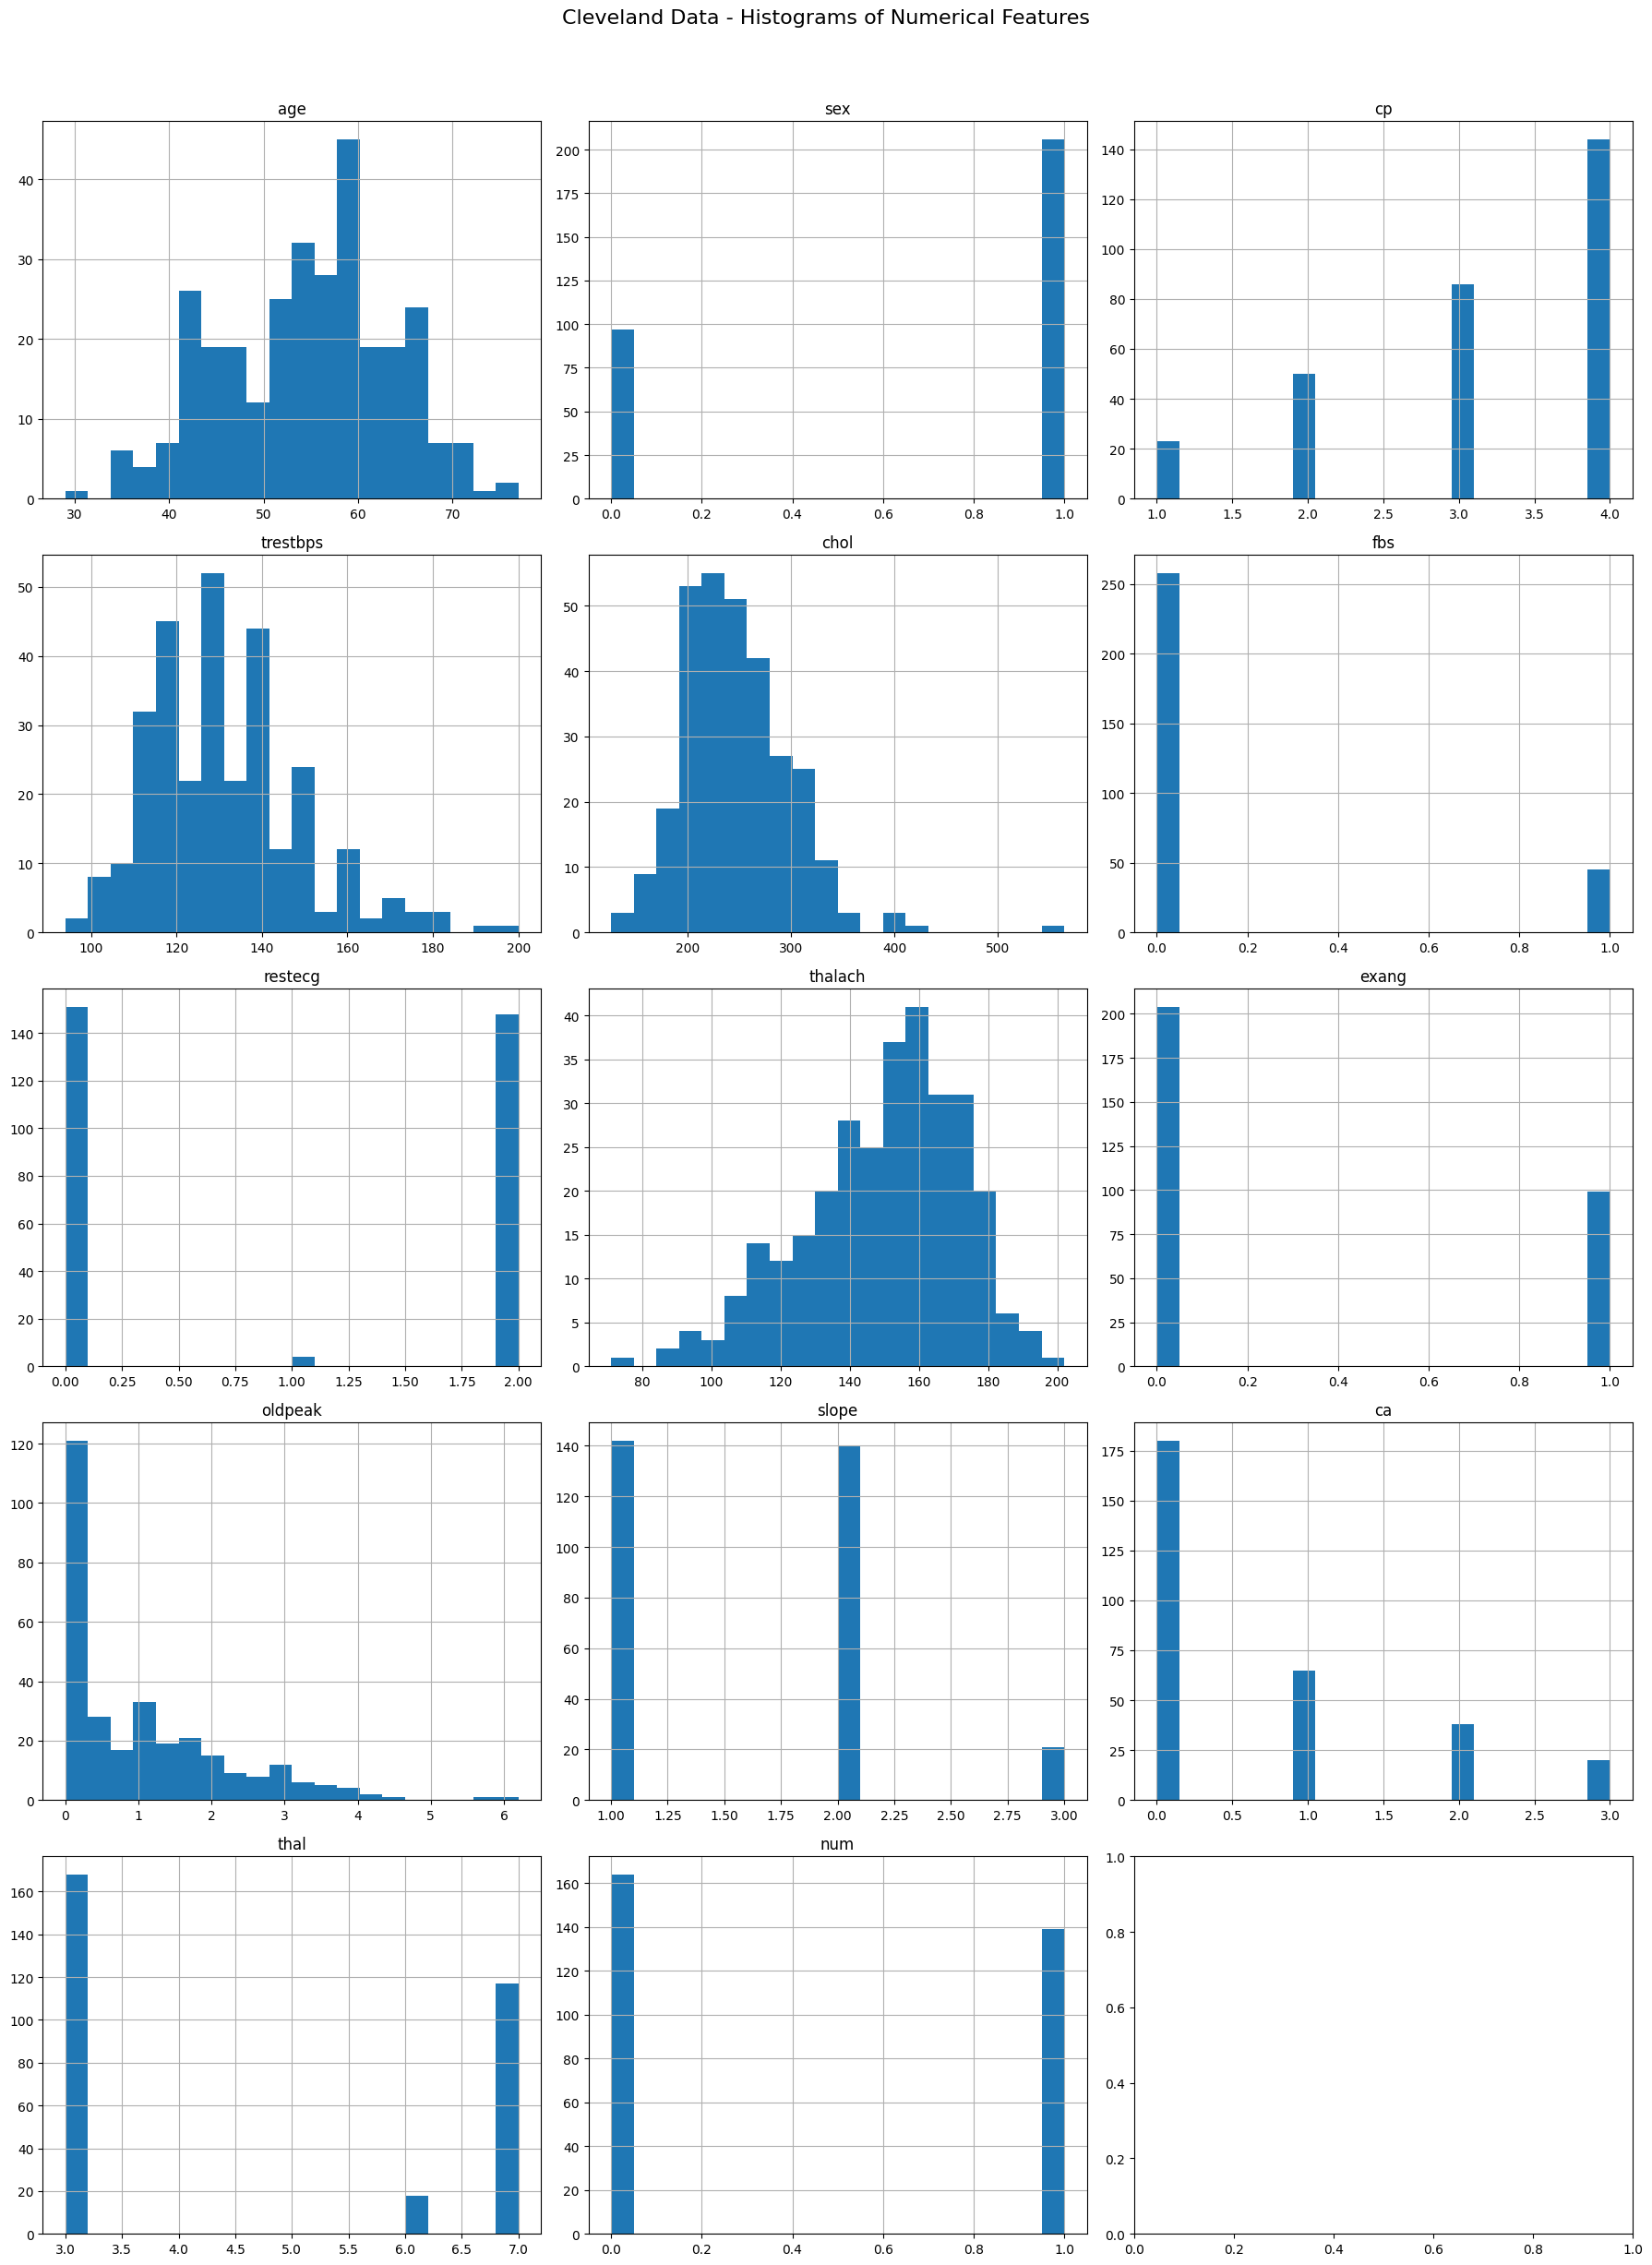

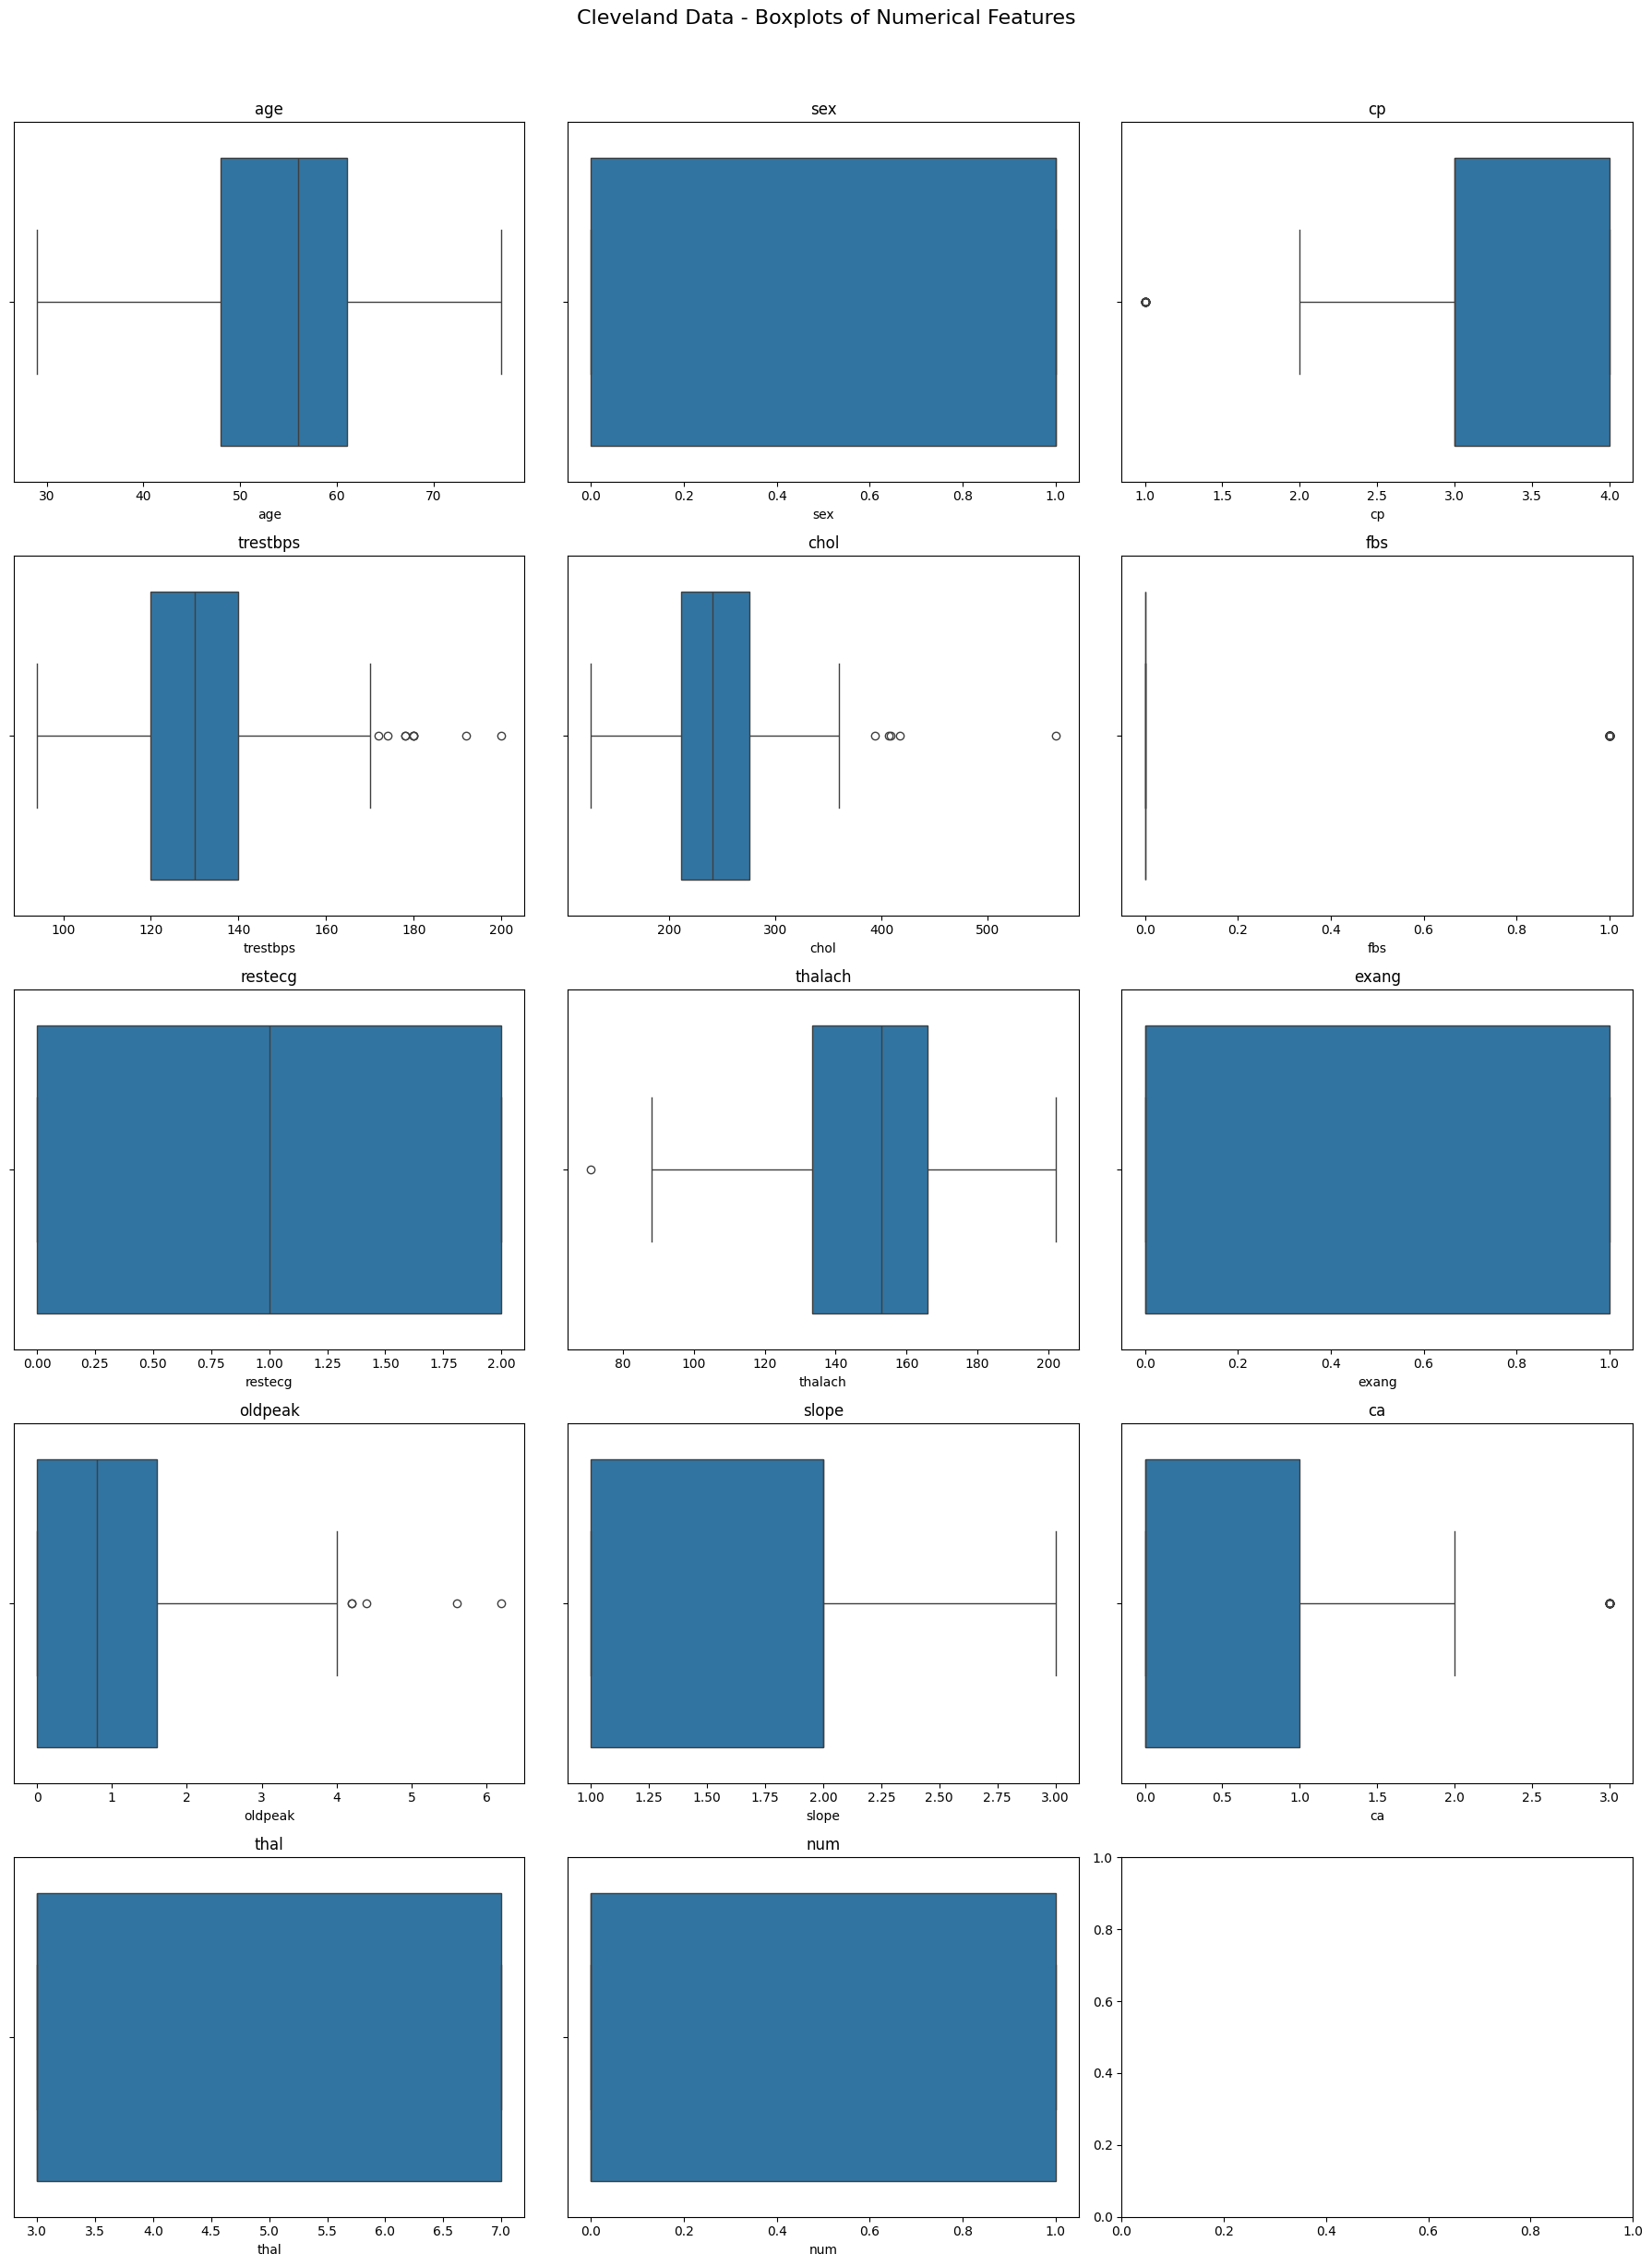

In [ ]:
plot_histograms(cleveland_data, "Cleveland Data")
plot_boxplots(cleveland_data, "Cleveland Data")


1. Age: The age distribution is skewed towards older individuals, indicating a
higher prevalence of heart disease in older age groups.
2. Trestbps (Resting Blood Pressure): The histogram suggests a normal distribution of resting blood pressure, but outliers may indicate individuals at risk.
3. Chol (Serum Cholesterol): The distribution highlights that most individuals have normal cholesterol levels, with a significant number having elevated levels.
4. Oldpeak: The distribution indicates a range of ST depression values, suggesting varying degrees of severity in heart disease symptoms.

1. Age: The box plot shows a wide interquartile range and outliers, suggesting older individuals are more likely to experience heart disease.
2. Trestbps: Outliers in the box plot indicate a subset of individuals with significantly high blood pressure readings, identifying potential high-risk patients.
3. Chol: The presence of outliers for cholesterol levels in the box plot suggests that some individuals may require medical attention for high cholesterol.
4. Oldpeak: The box plot indicates the presence of significant outliers, highlighting patients with severe symptoms related to heart disease.

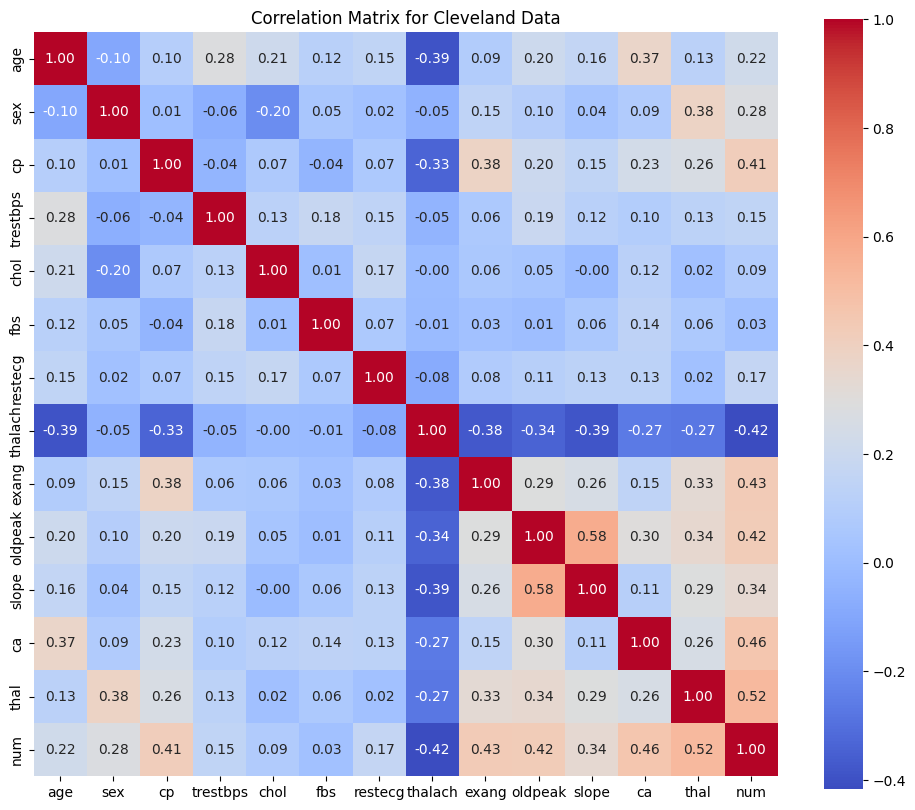

In [ ]:
def plot_correlation_matrix(data, data_name):
    plt.figure(figsize=(12, 10))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title(f'Correlation Matrix for {data_name}')
    plt.show()

plot_correlation_matrix(cleveland_data, "Cleveland Data")

Text(0.5, 1.0, 'Max Heart Rate vs Age')

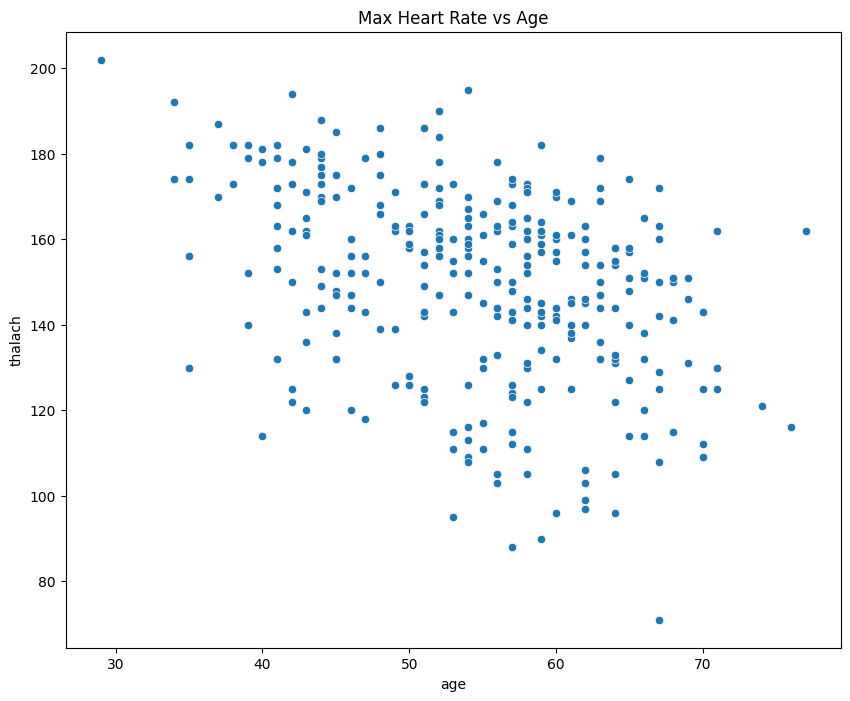

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=cleveland_data,x='age', y='thalach')
plt.title('Max Heart Rate vs Age')

1. Younger individuals tend to have higher maximum heart rates. This could indicate that as people age, their maximum heart rate tends to decrease.
2. Downward slope in data indicates negative correlation suggesting that as age increases maximum heart rate tends to decrease


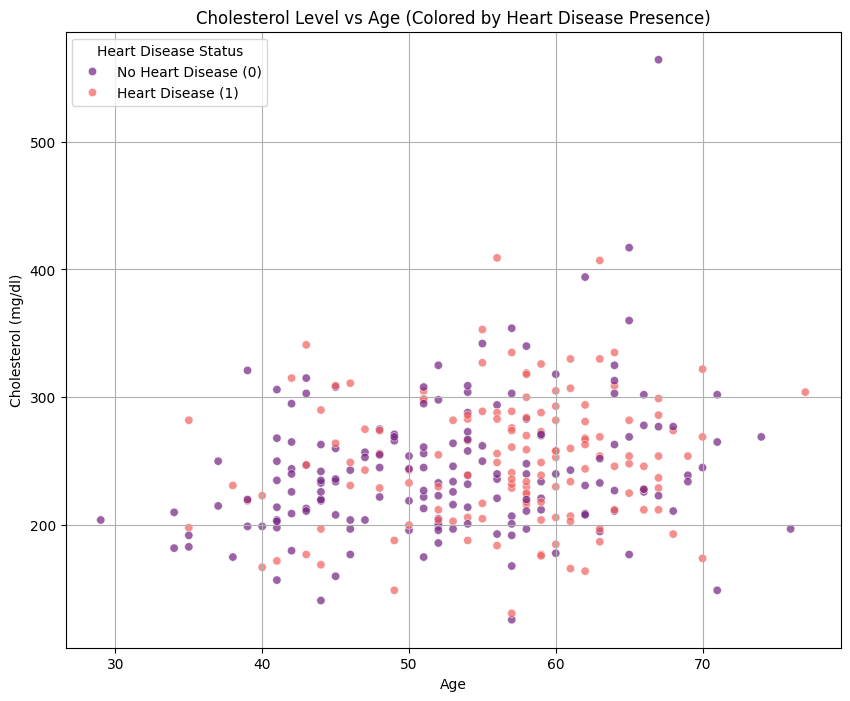

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cleveland_data, x='age', y='chol', hue='num', palette='magma', alpha=0.7)
plt.title('Cholesterol Level vs Age (Colored by Heart Disease Presence)')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No Heart Disease (0)', 'Heart Disease (1)']
plt.legend(handles=handles, labels=new_labels, title='Heart Disease Status')
plt.show()


1. As age increases, there seems to be a trend where cholesterol levels also increase.
2. Points representing individuals with heart disease (1) tend to cluster at higher cholesterol levels compared to those without heart disease (0).
3. This suggests that older individuals with elevated cholesterol levels may have a higher risk of developing heart disease, highlighting the importance of monitoring cholesterol levels as part of a preventative health strategy.

<ipython-input-188-a53c506e7806>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




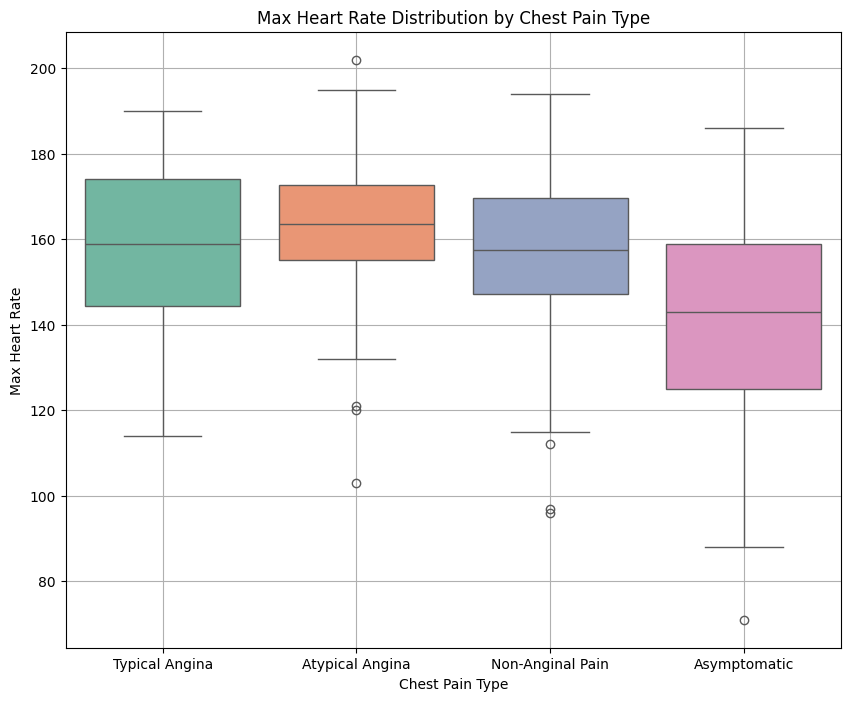

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=cleveland_data, x='cp', y='thalach', palette='Set2')
plt.title('Max Heart Rate Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Max Heart Rate')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.grid(True)
plt.show()


1. Patients experiencing Typical Angina demonstrate a median maximum heart rate of 160 bpm, which is notably lower compared to those with Atypical Angina, who achieve medians around 165-170 bpm. Additionally, individuals with Non-Anginal Pain and Asymptomatic individuals display lower median maximum heart rates of approximately 155 bpm and 150 bpm, respectively.

2. This suggests that Typical Angina is associated with a marked limitation in exercise capacity, likely due to symptoms that prevent patients from exerting themselves fully. Conversely, Atypical Angina patients exhibit better exercise tolerance, potentially reflecting less severe underlying coronary conditions or a different symptom presentation that allows for higher levels of physical activity.

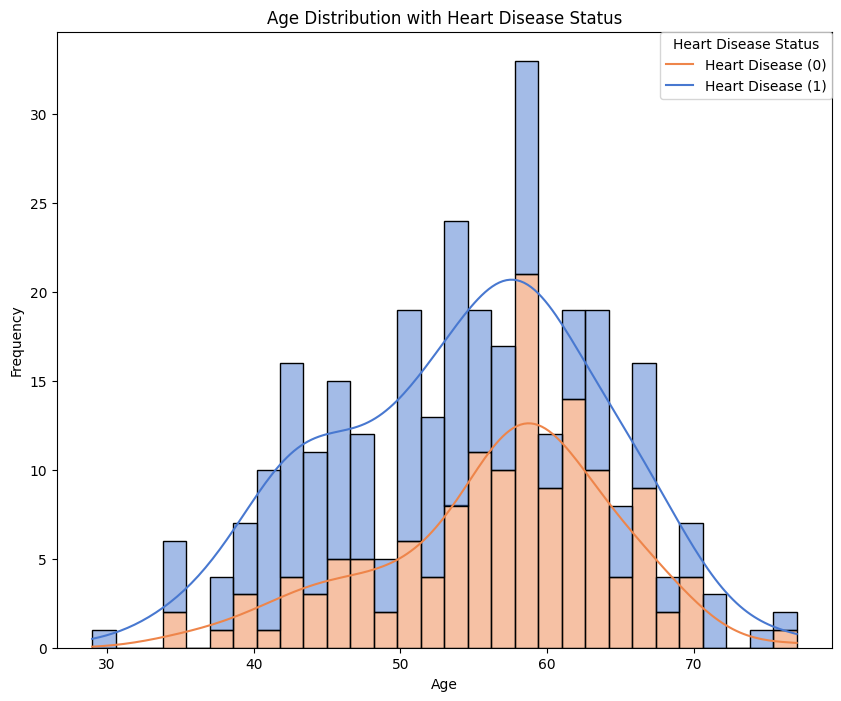

In [ ]:
plt.figure(figsize=(10, 8))
# Create the histogram with hue for heart disease status
sns.histplot(cleveland_data, x='age', hue='num', multiple='stack', bins=30, palette='muted', kde=True)

plt.title('Age Distribution with Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

unique_nums = cleveland_data['num'].unique()

new_labels = [f'Heart Disease ({int(num)})' for num in unique_nums]

plt.legend(new_labels, title='Heart Disease Status', loc='upper right', borderaxespad=0.)

plt.show()



1. The histogram reveals that individuals aged 50-60 have the highest frequency of heart disease (num = 1), indicating a significant correlation between this age group and the prevalence of heart disease.
2. In contrast, the age group of 40-50 shows a notably lower frequency of heart disease, suggesting that heart disease is less common in younger populations.

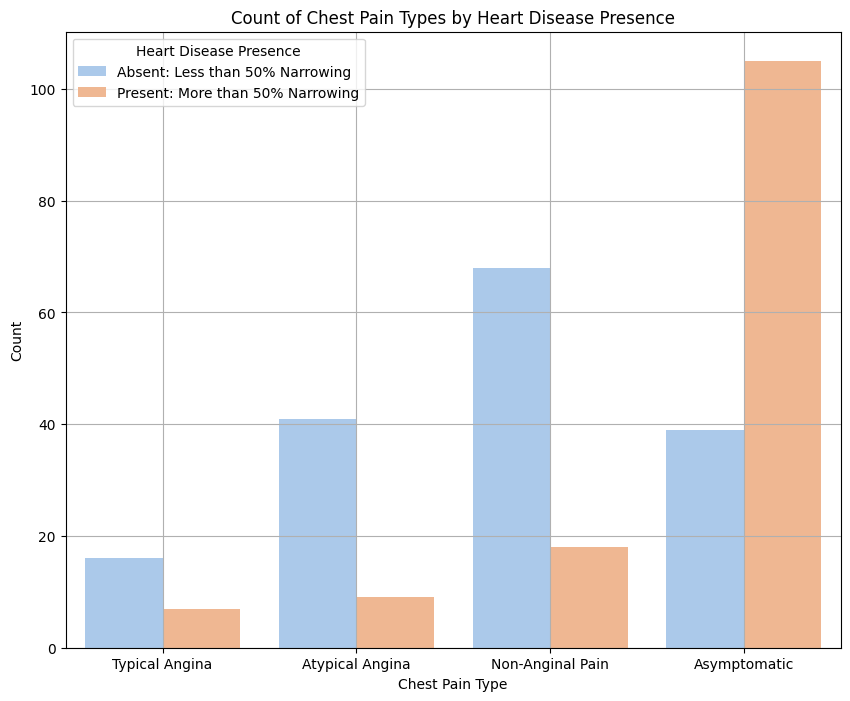

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=cleveland_data, x='cp', hue='num', palette='pastel')
plt.title('Count of Chest Pain Types by Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease Presence', labels=['Absent: Less than 50% Narrowing', 'Present: More than 50% Narrowing'])
plt.grid(True)
plt.show()


1. Asymptomatic individuals show the highest count among those with heart disease. This suggests that many individuals who may have significant cardiac conditions do not exhibit any symptoms, which can complicate diagnosis and treatment.
2. The analysis shows that Asymptomatic individuals have the highest frequency of heart disease, followed by Non-Anginal Pain, Atypical Angina, and Typical Angina. This highlights the importance of thorough cardiovascular assessments and awareness of diverse heart disease presentations to enhance patient outcomes.

In [ ]:
!pip install dash plotly


In [203]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go


app = dash.Dash(__name__)

app.layout = html.Div(style={'textAlign': 'center', 'backgroundColor': '#bcdfe6', 'padding': '20px'}, children=[
    html.H1("Heart Disease Data Explorer: Insights from Cleveland, Hungary, Switzerland, and Long Beach VA", style={'color': '#236a78'}),
    dcc.Dropdown(
        id='dataset-dropdown',
        options=[
            {'label': 'Cleveland', 'value': 'cleveland'},
            {'label': 'Hungary', 'value': 'hungarian'},
            {'label': 'Switzerland', 'value': 'switzerland'},
            {'label': 'Long Beach VA', 'value': 'va'}
        ],
        value='cleveland',
        style={'width': '50%', 'margin': 'auto', 'padding': '10px'}
    ),
    html.Div([
        dcc.Graph(id='age-distribution', style={'height': '300px'}),
        dcc.Graph(id='cholesterol-age', style={'height': '300px'})
    ], style={'display': 'flex', 'flexDirection': 'row', 'justifyContent': 'space-around'}),
    html.Div([
        dcc.Graph(id='chest-pain', style={'height': '300px'}),
        dcc.Graph(id='max-heart-rate-age', style={'height': '300px'})
    ], style={'display': 'flex', 'flexDirection': 'row', 'justifyContent': 'space-around'})
])

@app.callback(
    Output('age-distribution', 'figure'),
    Output('cholesterol-age', 'figure'),
    Output('chest-pain', 'figure'),
    Output('max-heart-rate-age', 'figure'),
    Input('dataset-dropdown', 'value')
)
def update_graphs(selected_dataset):
    if selected_dataset == 'cleveland':
        dataset = cleveland_data
    elif selected_dataset == 'hungarian':
        dataset = hungarian_data
    elif selected_dataset == 'switzerland':
        dataset = switzerland_data
    elif selected_dataset == 'va':
        dataset = va_data

    chest_pain_labels = {
        1: 'Typical Angina',
        2: 'Atypical Angina',
        3: 'Non-Anginal Pain',
        4: 'Asymptomatic'
    }
    dataset['cp_label'] = dataset['cp'].map(chest_pain_labels)

    age_dist_fig = px.histogram(dataset, x='age', color='num',
                                 title='Age Distribution with Heart Disease Status',
                                 labels={'num': 'Heart Disease Presence'},
                                 color_discrete_map={'0': 'blue', '1': 'red'},
                                 )

    cholesterol_age_fig = px.scatter(dataset, x='age', y='chol', color='num',
                                      title='Cholesterol Level vs Age',
                                      labels={'num': 'Heart Disease Presence'},
                                      color_discrete_map={'0': 'blue', '1': 'red'},
                                      )


    chest_pain_fig = px.histogram(dataset, x='cp_label', color='num',
                               title='Count of Chest Pain Types by Heart Disease Presence',
                               labels={'num': 'Heart Disease Presence'},
                               color_discrete_map={'0': 'blue', '1': 'red'},
                               text_auto=True)

    max_heart_rate_age_fig = px.scatter(dataset, x='age', y='thalach', color='num',
                                         title='Max Heart Rate vs Age',
                                         labels={'num': 'Heart Disease Presence'},
                                         color_discrete_map={'0': 'blue', '1': 'red'},
                                         )

    return age_dist_fig, cholesterol_age_fig, chest_pain_fig, max_heart_rate_age_fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

## MACHINE LEARNING MODELS FOR PREDICTION OF HEART DISEASE

In [255]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [205]:
data=cleveland_data

In [206]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,cp_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Typical Angina
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,Asymptomatic
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Asymptomatic
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Non-Anginal Pain
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Atypical Angina


In [212]:
df = pd.DataFrame(data)
df = df.drop('cp_label', axis=1)
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

In [235]:

seed = 42

classifiers = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=seed),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=seed),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(random_state=seed),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=seed),
    'MLPClassifier': MLPClassifier(random_state=seed),
    'GaussianNB': GaussianNB()
}


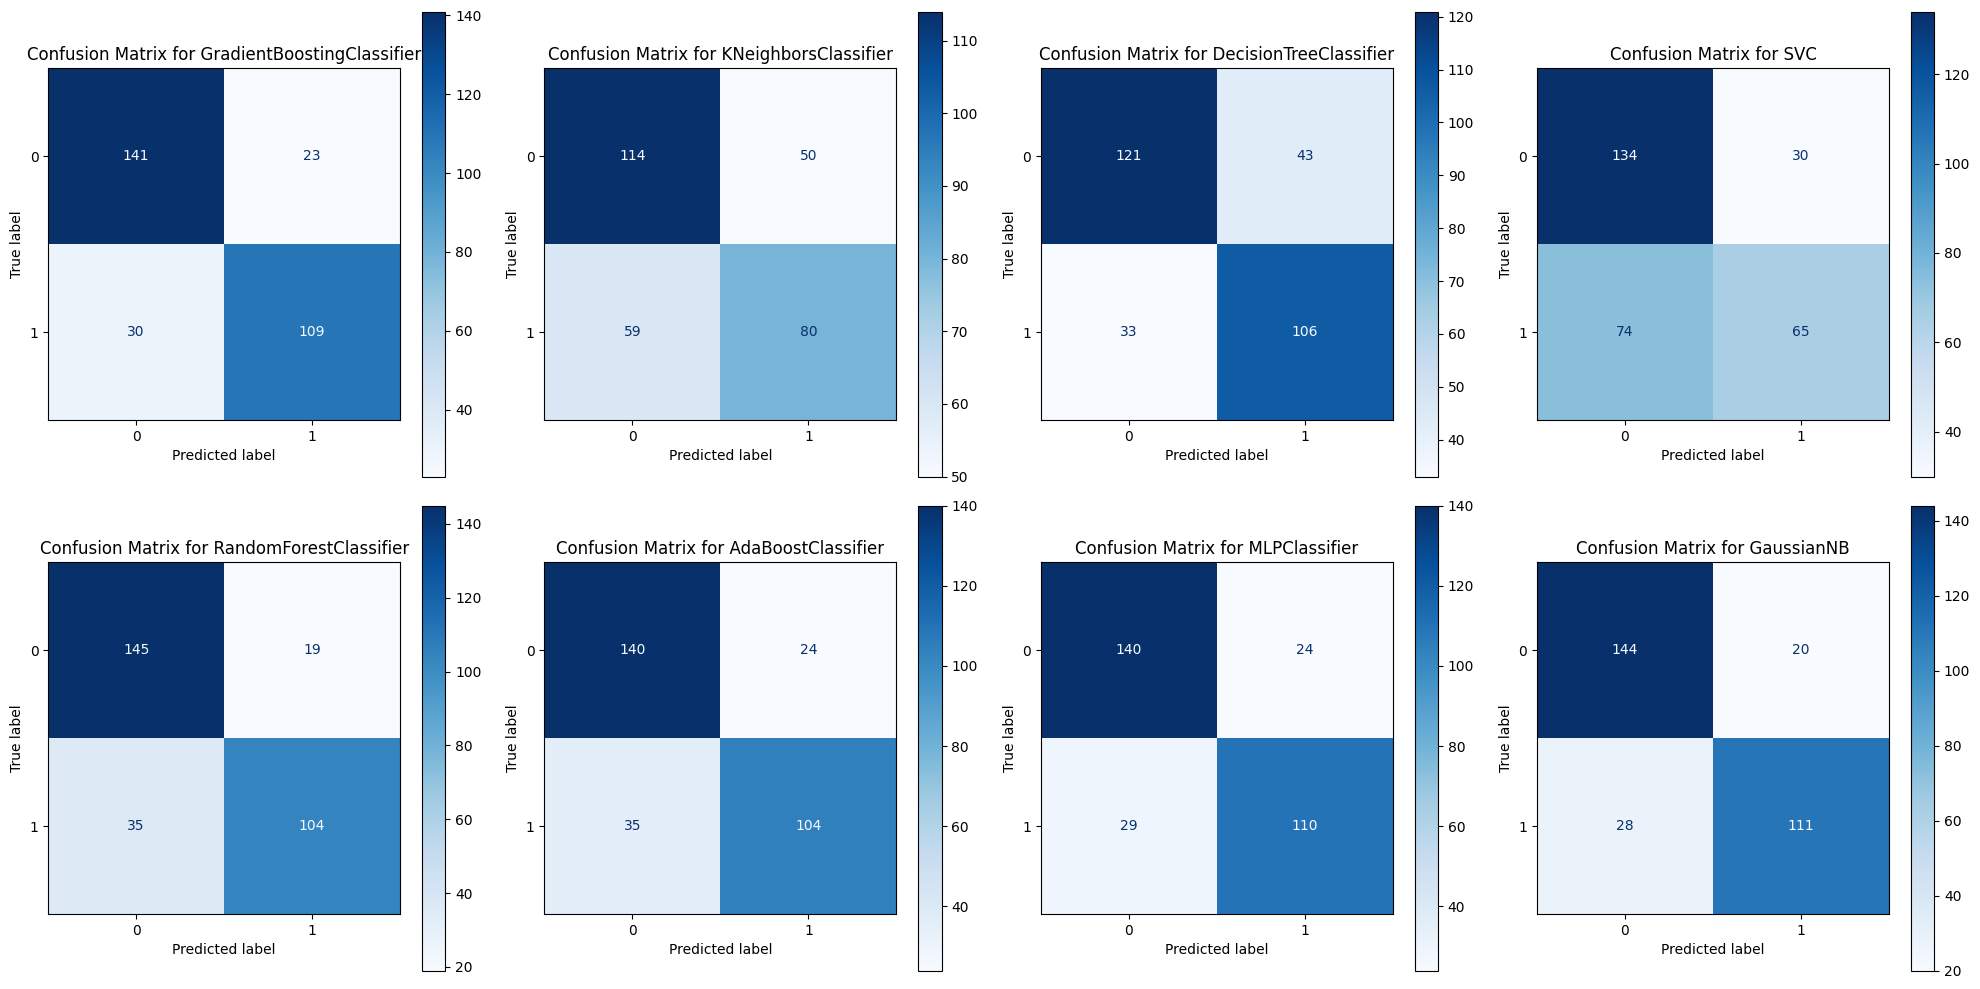

                        Model  F1 Score  Accuracy   ROC AUC  Precision  \
7                  GaussianNB  0.841123  0.841584  0.838305   0.841851   
6               MLPClassifier  0.824794  0.825083  0.822513   0.824959   
0  GradientBoostingClassifier  0.824651  0.825083  0.821964   0.825110   
4      RandomForestClassifier  0.820485  0.821782  0.816174   0.823893   
5          AdaBoostClassifier  0.804429  0.805281  0.800930   0.805734   
2      DecisionTreeClassifier  0.749586  0.749175  0.750197   0.751627   
3                         SVC  0.644795  0.656766  0.642350   0.662571   
1        KNeighborsClassifier  0.639050  0.640264  0.635331   0.638970   

     Recall  
7  0.841584  
6  0.825083  
0  0.825083  
4  0.821782  
5  0.805281  
2  0.749175  
3  0.656766  
1  0.640264  


In [258]:
def model_check(X, y, classifiers, cv):
    results = []
    n_models = len(classifiers)
    n_cols = (n_models + 1) // 2

    fig, axes = plt.subplots(2, n_cols, figsize=(5 * n_cols, 10))

    axes = axes.flatten()

    for i, (name, model) in enumerate(classifiers.items()):

        y_pred = cross_val_predict(model, X, y, cv=cv)

        # Calculate metrics
        f1 = f1_score(y, y_pred, average='weighted')
        accuracy = accuracy_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')

        results.append((name, f1, accuracy, roc_auc, precision, recall))


        conf_matrix = confusion_matrix(y, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
        disp.plot(ax=axes[i], cmap=plt.cm.Blues)
        axes[i].set_title(f'Confusion Matrix for {name}')

    if n_models % 2 != 0:
        axes[-1].axis('off')

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(results, columns=['Model', 'F1 Score', 'Accuracy', 'ROC AUC', 'Precision', 'Recall'])


baseline_results = model_check(X, y, classifiers, cv)
print(baseline_results.sort_values(by='F1 Score', ascending=False))

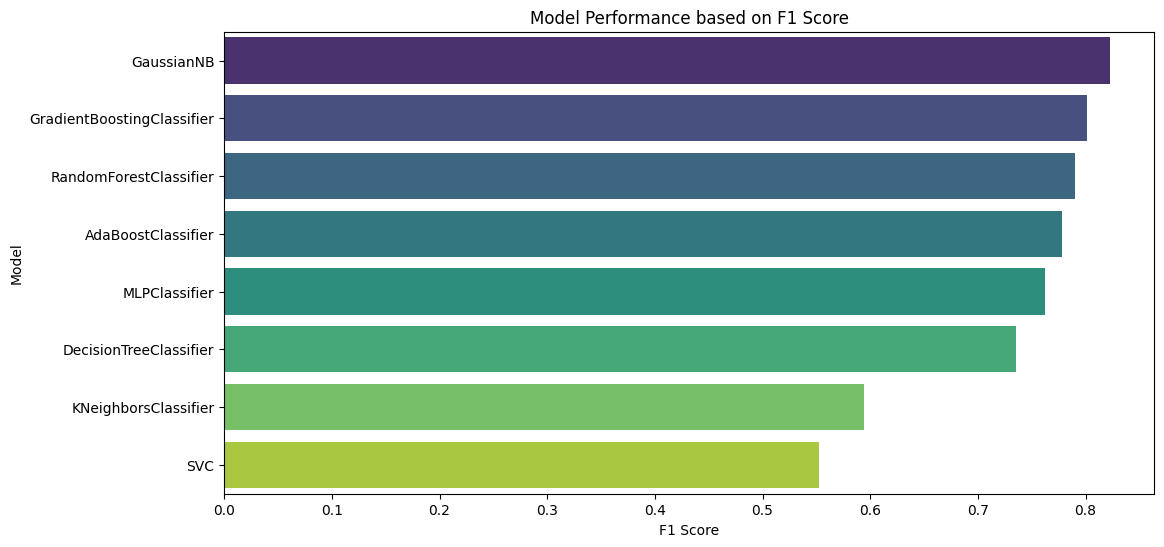

In [244]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Model', data=baseline_results.sort_values(by='F1 Score', ascending=False), palette='viridis')
plt.title('Model Performance based on F1 Score')
plt.show()


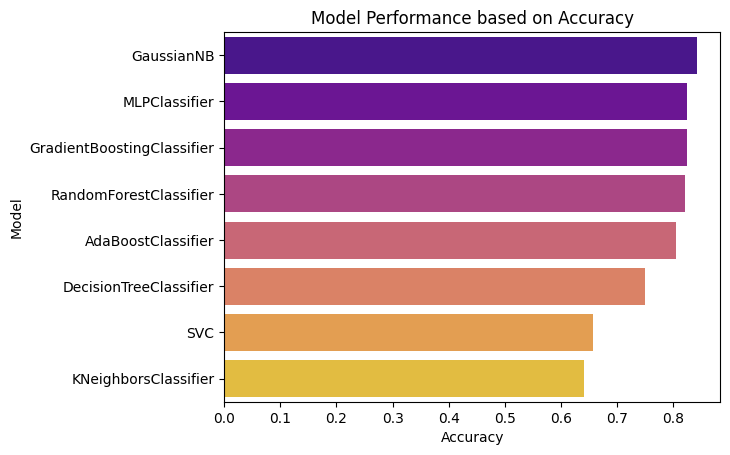

<Figure size 1200x600 with 0 Axes>

In [247]:

sns.barplot(x='Accuracy', y='Model', data=baseline_results.sort_values(by='Accuracy', ascending=False), palette='plasma')
plt.title('Model Performance based on Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')

plt.figure(figsize=(12, 6))
plt.show()

1. GaussianNB has the highest F1 Score (0.8226) and accuracy (0.8413), indicating it is the best performing model for this dataset.
2. MLPClassifier and GradientBoostingClassifier are also strong contenders, with F1 Scores around 0.80, suggesting they are effective in balancing precision and recall.